Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import requests
import pandas as pd

In [63]:
df_main = pd.read_excel('dataframe.xlsx')
df_poi = pd.read_excel('dataframe_poi.xlsx')
df_poi
frames = [df_main, df_poi]
df = pd.concat(frames,  ignore_index=True)


In [77]:
df["latitude"]= df["latitude"].round(2)
df["longitude"]= df["longitude"].round(2)
df["name"] = df["name"].fillna("Bike Rentals")
df["rating"] = df["rating"].fillna("Not Available")
df["city"] = df["city"].fillna("Assemini")
df

,city,free Bikes,latitude,longitude,name,rating,address,places_around,free_bikes_around,free_Bikes
0,Assemini,4.0,39.30,9.00,Bike Rentals,Not Available,NaN,6,0,NaN
1,Assemini,5.0,39.26,9.15,Bike Rentals,Not Available,NaN,0,0,NaN
2,Assemini,0.0,39.29,9.00,Bike Rentals,Not Available,NaN,6,0,NaN
3,Assemini,0.0,39.26,9.14,Bike Rentals,Not Available,NaN,0,0,NaN
4,Assemini,0.0,39.25,9.13,Bike Rentals,Not Available,NaN,0,0,NaN
5,Assemini,3.0,39.27,9.05,Bike Rentals,Not Available,NaN,0,0,NaN
6,Assemini,0.0,39.29,9.00,Bike Rentals,Not Available,NaN,6,0,NaN
7,Assemini,1.0,39.29,9.01,Bike Rentals,Not Available,NaN,1,0,NaN
8,Assemini,4.0,39.29,8.99,Bike Rentals,Not Available,NaN,2,0,NaN
9,Assemini,6.0,39.25,9.17,Bike Rentals,Not Available,NaN,0,0,NaN


In [83]:
# Step 1: Create a column for the number of nearby places
df['places_around'] = 0

# Step 2: Calculate places around bike rentals
for idx, row in df.iterrows():
    if row['name'] == 'Bike Rentals':
        # Count how many other places share the same lat-long
        places_around = df[(df['latitude'] == row['latitude']) & (df['longitude'] == row['longitude'])].shape[0] - 1
        df.at[idx, 'places_around'] = places_around


# Step 4: Calculate free bikes around non-bike rental places
for idx, row in df.iterrows():
    if row['name'] != 'Bike Rentals':
        # Find bike rentals at the same lat-long
        bike_rentals_at_location = df[(df['latitude'] == row['latitude']) & (df['longitude'] == row['longitude']) & (df['name'] == 'Bike Rentals')]
        # Sum the free bikes from the bike rentals
        free_bikes_sum = bike_rentals_at_location['free Bikes'].sum()
        # Update the 'free Bikes' column for the non-bike rental place
        df.at[idx, 'free Bikes'] = free_bikes_sum

# Display the updated DataFrame

df

,city,free Bikes,latitude,longitude,name,rating,address,places_around
0,Assemini,4.0,39.30,9.00,Bike Rentals,Not Available,NaN,6
1,Assemini,5.0,39.26,9.15,Bike Rentals,Not Available,NaN,0
2,Assemini,0.0,39.29,9.00,Bike Rentals,Not Available,NaN,6
3,Assemini,0.0,39.26,9.14,Bike Rentals,Not Available,NaN,0
4,Assemini,0.0,39.25,9.13,Bike Rentals,Not Available,NaN,0
5,Assemini,3.0,39.27,9.05,Bike Rentals,Not Available,NaN,0
6,Assemini,0.0,39.29,9.00,Bike Rentals,Not Available,NaN,6
7,Assemini,1.0,39.29,9.01,Bike Rentals,Not Available,NaN,1
8,Assemini,4.0,39.29,8.99,Bike Rentals,Not Available,NaN,2
9,Assemini,6.0,39.25,9.17,Bike Rentals,Not Available,NaN,0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

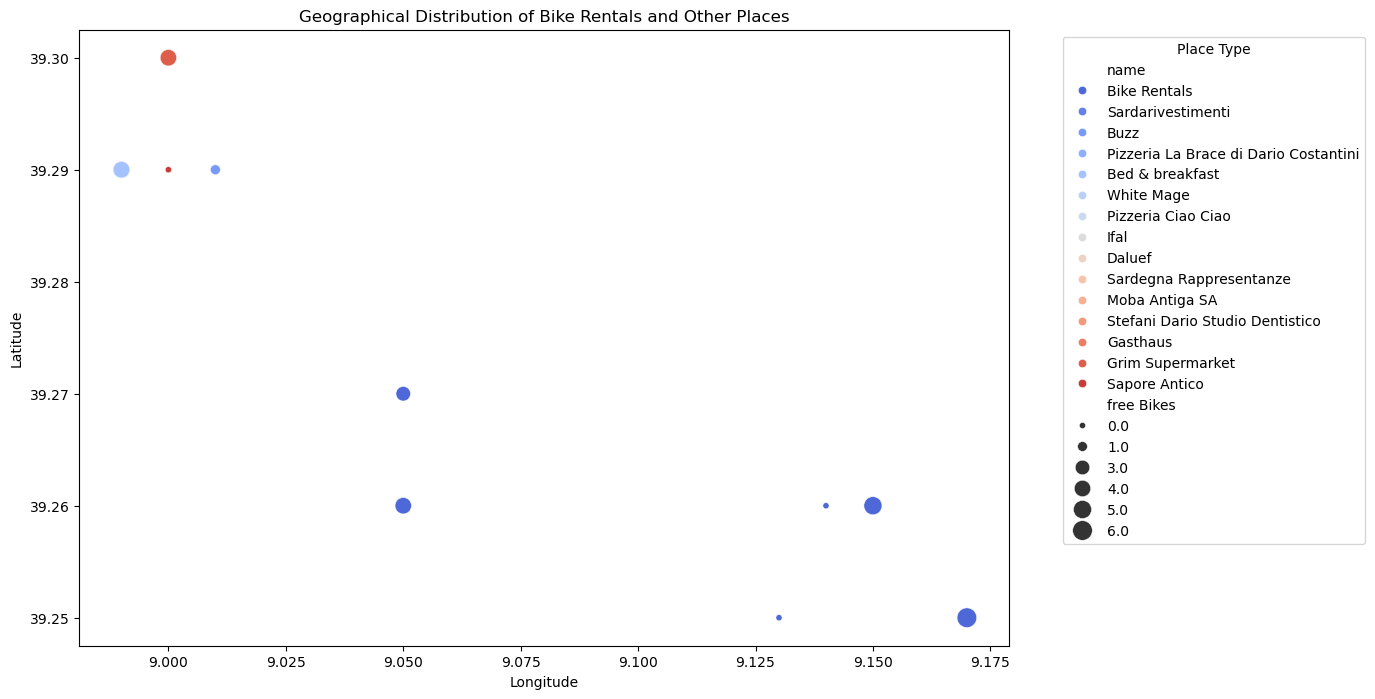

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='name',
    size='free Bikes',
    sizes=(20, 200),
    data=df,
    palette='coolwarm'
)

# Adding titles and labels
plt.title('Geographical Distribution of Bike Rentals and Other Places')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Place Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [105]:
import os
import sqlite3
import pandas as pd

# Ensure the 'data' directory exists
if not os.path.exists('C:/Users/karen/python_practice/Statistical-Modelling-Project/data'):
    os.makedirs('C:/Users/karen/python_practice/Statistical-Modelling-Project/data')

# Path to the SQLite3 database file
db_path = 'C:/Users/karen/python_practice/Statistical-Modelling-Project/data/my_results.db'

# Connect to the SQLite3 database
conn = sqlite3.connect(db_path)

df.to_sql('places_data', conn, if_exists='replace', index=False)

# Commit the transaction
conn.commit()



print(f"Data successfully stored in {db_path}")

Data successfully stored in C:/Users/karen/python_practice/Statistical-Modelling-Project/data/my_results.db


Look at the data before and after the join to validate your data.

In [107]:
#CHecking if db transfer was succesful
query_result = pd.read_sql_query("SELECT * FROM places_data", conn)
print(query_result)
conn.close()

        city  free Bikes  latitude  longitude  \
0   Assemini         4.0     39.30       9.00   
1   Assemini         5.0     39.26       9.15   
2   Assemini         0.0     39.29       9.00   
3   Assemini         0.0     39.26       9.14   
4   Assemini         0.0     39.25       9.13   
5   Assemini         3.0     39.27       9.05   
6   Assemini         0.0     39.29       9.00   
7   Assemini         1.0     39.29       9.01   
8   Assemini         4.0     39.29       8.99   
9   Assemini         6.0     39.25       9.17   
10  Assemini         4.0     39.26       9.05   
11  Assemini         4.0     39.29       8.99   
12  Assemini         1.0     39.29       9.01   
13  Assemini         4.0     39.30       9.00   
14  Assemini         4.0     39.29       8.99   
15  Assemini         4.0     39.30       9.00   
16  Assemini         4.0     39.30       9.00   
17  Assemini         4.0     39.30       9.00   
18  Assemini         4.0     39.30       9.00   
19  Assemini        